learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system

test error: 
0.26236175202674245


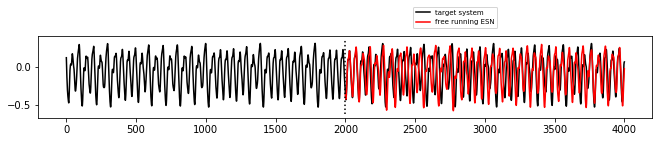

In [15]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 0.95,
          random_state=50)

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

In [14]:
help(ESN)

Help on class ESN in module pyESN:

class ESN
 |  Methods defined here:
 |  
 |  __init__(self, n_inputs, n_outputs, n_reservoir=200, spectral_radius=0.95, sparsity=0, noise=0.001, input_shift=None, input_scaling=None, teacher_forcing=True, feedback_scaling=None, teacher_scaling=None, teacher_shift=None, out_activation=<function <lambda>>, inverse_out_activation=<function <lambda>>, random_state=None, silent=True)
 |      Args:
 |          n_inputs: nr of input dimensions
 |          n_outputs: nr of output dimensions
 |          n_reservoir: nr of reservoir neurons
 |          spectral_radius: spectral radius of the recurrent weight matrix
 |          sparsity: proportion of recurrent weights set to zero
 |          noise: noise added to each neuron (regularization)
 |          input_shift: scalar or vector of length n_inputs to add to each
 |                      input dimension before feeding it to the network.
 |          input_scaling: scalar or vector of length n_inputs to multip